In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

##### Upload Widget Is Only Available When The Cell Has Been Executed In The Current Browser Session.Please Rerun This Cell To Enable.Saving Telco_customer_churn.csv To Telco_customer_churn (1).csv

In [2]:
# Loading The Csv With Pandas

data = pd.read_csv('Telco_Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Types Of Data In Dataset

data.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Removing Customer Ids From The Data Set The Columns Not Used In The Predictive Model.

df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### From The Above Output, It Can Be Seen That, There Are 11 Missing Values For Total Charges.Replacing 11 Rows From The Data Set. Also Predictor Variable Here Is Churn. Therefore, It Is Necessary To Convert The Predictor Variable In Binary Numeric Variable.¶

In [6]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Converting All The Categorical Variables Into Dummy Variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

C:\Users\rakes\AppData\Local\Temp\ipykernel_22428\27488963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
C:\Users\rakes\AppData\Local\Temp\ipykernel_22428\27488963.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [7]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-nul

#### Predictive Modelling :-
We Will Consider Several Different Models To Predict Customer Churn. To Ensure We Are Not Over-fitting To Our Data, We Will Split The 7,043 Customer Records Into A Training And Test Set, With The Test Set Being 20% Of The Total Records. It Is Important To Scale The Variables In Regression So That All Of Them Are Within A Range Of 0 To 1.

Logistic Regression Requires There To Be Little Or No Multicollinearity Among The Independent Variables.

Therefore, As Discussed In The Begining, Total Charges Will Be Removed.

In [8]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # Removing Total Charges To Avoid Multicolinearity.

# Using The Data Frame Where We Had Created Dummy Variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling All The Variables To A Range Of 0 To 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

#### METHODOLOGY :-
Our First Step Was To Split Our Data Into Training And Test Sets Using Train-test-split,
Which Would Allow Us To Cross-validate Our Results Later. We Also Stratified The Train-test-split, 
To Ensure That The Same Proportion Of Our Target Variable Was Found In Both Our Training And Test Sets.

#### SPILITING THE DATA :- 
X Is The Data With The Independent Variables, Y Is The Data With The Dependent Variable. 
The Test Size Variable Determines In Which Ratio The Data Will Be Split. 
It Is Quite Common To Do This In A 80 Training / 20 Test Ratio. Also Ned To Stratify The Train-test-split To Have A Balanced Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))    

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


#### LOGISTIC REGRESSION :- 

Using Machine Learning Algorithm And The Dependent Variable Here Churn 1 Or Churn 0 Is Categorical.
The Trained Model Can Be Used To Predict If A Customer Churned Or Not For The Test Dataset.
The Results Are Saved In “prediction_test” And Afterwards The Accuracy Score Is Measured And Printed.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

lr_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
# Result = Lr.model.fit(X_train, y_train)

lr_prediction = lr_model.predict_proba(X_test)
lr_model.score(X_test, y_test)

0.8017057569296375

In [11]:
# ACCURACY :-

Accuracy = (502+77)*100/(502+55+70+77)
print("Accuracy {:0.2f}%",format(Accuracy))

Accuracy {:0.2f}% 82.24431818181819


##### The Classifier Is Predicting A 1 (Having A Possibility Of Churn) Any Time The Probability In The Second Column Is Greater Than 0.5. The Positive Class Probability Is Returned By The Models In The Second Column (Index=1):

In [12]:
lr_prediction[:5]

array([[0.60279219, 0.39720781],
       [0.98805339, 0.01194661],
       [0.98913583, 0.01086417],
       [0.84676136, 0.15323864],
       [0.73963885, 0.26036115]])

##### Now Let’s Generate Some Evaluation Metrics.

In [13]:
lr_pred = lr_model.predict(X_test)
# lr_pred = prediction_test # Prediction

# Print The Prediction Accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, lr_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, lr_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, lr_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [14]:
from sklearn.metrics import roc_auc_score
print (metrics.roc_auc_score(y_test, lr_prediction[:, 1]))

0.8408094382697195


In [15]:
# Compute The Decision Scores
y_scores_lr = lr_model.decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# Show The Decision_Function Scores For First 20 Instances 
y_score_list

[(1, -0.41711290560383363),
 (0, -4.415289273862642),
 (0, -4.511361590267521),
 (0, -1.7094224424997204),
 (1, -1.0440923391335424),
 (0, -0.18628990431257053),
 (0, -2.863584039981707),
 (0, -2.2366622671051744),
 (0, -4.416933336827468),
 (0, -0.7450920483299148),
 (1, -1.6034017700207923),
 (1, 0.28218159294237455),
 (0, -2.9513351717604754),
 (1, 1.1004655953470004),
 (0, -3.7891952259640878),
 (0, -5.349540254805008),
 (0, 0.8149567535580051),
 (1, 0.3558686708865655),
 (0, -0.12006557899279124),
 (0, -2.898945415060453)]

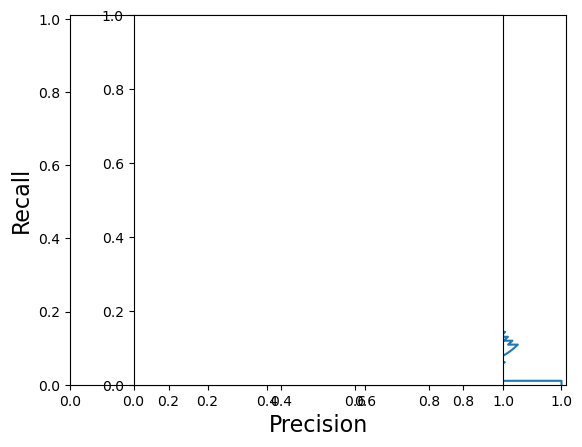

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
#Plot
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')

<Axes: >

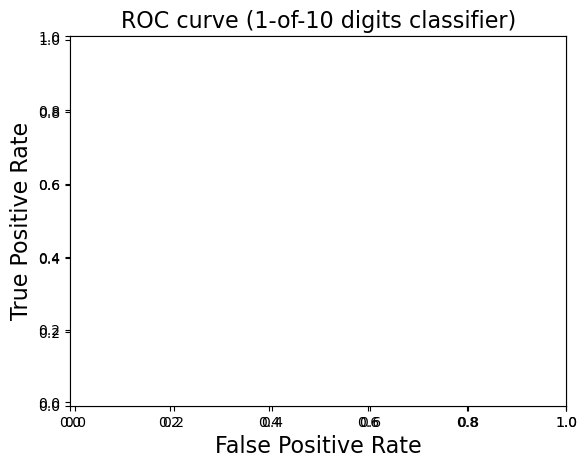

In [26]:
from sklearn.metrics import roc_curve, auc

# Compute And Plot The ROC
y_score_lr = lr_model.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes()

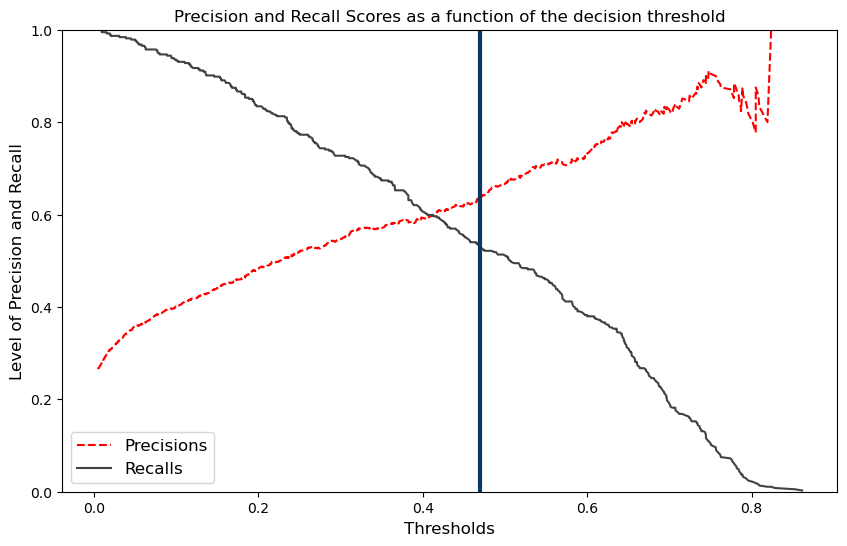

In [27]:

from sklearn.metrics import precision_recall_curve
y_scores=lr_prediction
prec, rec, tre = precision_recall_curve(y_test, y_scores[:,1], )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.ylabel("Level of Precision and Recall", fontsize=12)
    plt.title("Precision and Recall Scores as a function of the decision threshold", fontsize=12)
    plt.xlabel('Thresholds', fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.ylim([0,1])
    plt.axvline(x=0.47, linewidth=3, color="#0B3861")
    
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_scores[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.66


In [29]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

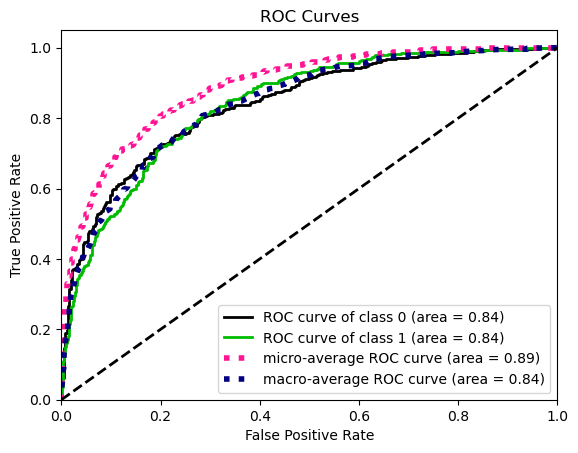

In [30]:
# To Make Things Easy

import scikitplot as skplt 

skplt.metrics.plot_roc(y_test, lr_prediction)

Confusion matrix
[[937  96]
 [183 191]]


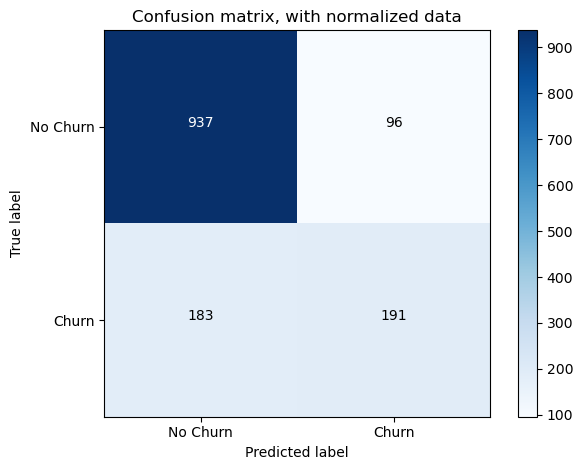

In [31]:
import itertools

# Evaluation Of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute Confusion Matrix
cnf_matrix = confusion_matrix(y_test, lr_pred)
np.set_printoptions(precision=2)

# Plot Non-Normalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

In [32]:
# F1 = 2 * ( Precision * Recall) / ( Precision + Recall)
f1 = 2*(0.5833*0.5238)/(0.5833 + 0.5238)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.55


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



##### Similarly, Train A Random Forest Model And Predict On The Validation Set.

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=101, n_estimators=100).fit(X_train, y_train)
rf_prediction = rf_model.predict_proba(X_test)
rf_model.score(X_test, y_test)
# rf_pred = Prediction_Test # Prediction

0.7953091684434968

In [35]:
rfpred_test = rf_model.predict(X_test)

In [36]:
print(classification_report(y_test, rfpred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



### Calibration Plot:-
Once I have the class probabilities and labels, I can compute the bins for a calibration plot. Here I use sklearn.calibration.calibration_curve that returns the (x,y) coordinates of the bins on the calibration plot.

In [37]:
from sklearn.calibration import calibration_curve
lr_y, lr_x = calibration_curve(y_test, lr_prediction[:,1], n_bins=20)

##### Note That Although I Asked For 20 Bins For Logistic Regression, 2 Bins Out Of 20 Don’t Have Any Data. The Reason Is A Combination Of That Logistic Regresion Being A Simple Model, That There Are Only Two Features, And That I Have 704 Points Of Data In The Validation Set.

In [38]:
[lr_y, lr_x]

[array([0.02, 0.11, 0.12, 0.21, 0.25, 0.3 , 0.36, 0.44, 0.39, 0.35, 0.42,
        0.61, 0.55, 0.75, 0.74, 0.94, 0.75, 1.  ]),
 array([0.02, 0.07, 0.12, 0.18, 0.23, 0.27, 0.32, 0.38, 0.43, 0.47, 0.52,
        0.58, 0.63, 0.67, 0.73, 0.77, 0.81, 0.86])]

##### Next, I Compute The Coordinates For The Bins Of Random Forest Model.

In [40]:
rf_y, rf_x = calibration_curve(y_test, rf_prediction[:,1], n_bins=20)

##### Now I can plot the two calibration curves.

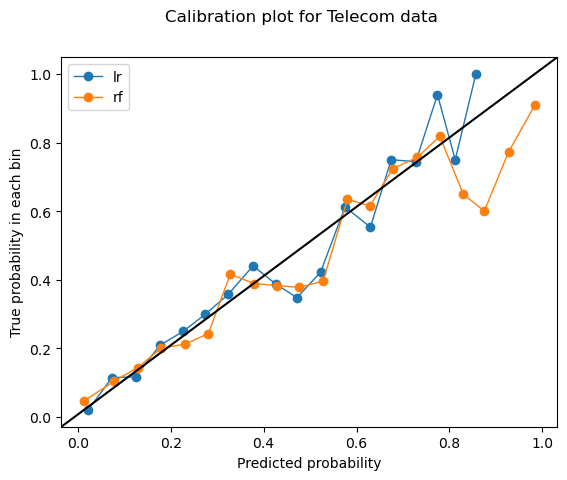

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# Only These Two Lines Are Calibration Curves
plt.plot(lr_x,lr_y, marker='o', linewidth=1, label='lr')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# Reference Line, legends, And Axis Labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Telecom data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show() 

In [42]:
def bin_total(y_true, y_prob, n_bins):
    bins = np.linspace(0., 1. + 1e-8, n_bins + 1)

    # In Sklearn.Calibration.Calibration_Curve,
    # The Last Value In The Array Is Always 0.
    binids = np.digitize(y_prob, bins) - 1

    return np.bincount(binids, minlength=len(bins))

bin_total(y_test, lr_prediction[:,1], n_bins=20)

array([388, 148, 111, 115,  88,  60,  56,  59,  49,  46,  45,  49,  47,
        60,  43,  33,   8,   2,   0,   0,   0], dtype=int64)

The Missing Bins Have Endpoint Values Of 75%, 85%, And 95%. I Want My Predictions To Avoid Those Empty Bins And Become Discriminative.

Discrimination Is A Concept That Goes Side-by-side With Calibration In Classification Problems. Sometimes It Comes Before Calibration If The Goal In Building A Model Is To Make Automatic Decisions Rather Than Provide Statistical Estimates.

Discrimination Is Often Checked With The Receiver Operating Characteristic Curves.

### Cross-validation?
If I Don’t Care About Discrimination And Only Want Good Calibration, Then Logistic Regression (Blue) Seems To Do Better Than Random Forest (Orange). Is That Really The Case? In Particular, If I Look Into The Number Of Points In The Bins For Random Forest. Closer To The Diagonal Line Indicates God Fit.


In [43]:
bin_total(y_test, rf_prediction[:,1], n_bins=20)

array([409, 143, 104,  95,  80,  74,  72,  54,  47,  45,  48,  41,  39,
        29,  37,  22,  20,  15,  22,  11,   0], dtype=int64)

I Suspect That The Problem May Be That Some Bins Have Too Few Data Points. I Put 704 Points In 20 Bins, So Some Bins Will Only Get A Few, Therefore The Calibration Plot Suffers Because One Misclassification In A Tiny Bin Changes The Proportion Greatly.

Only 20% Of My Data Was Used In The Previous Plot, So Maybe I Can Use More. To Make Use All Of My Data In Testing Calibration Among Different Models, I Thought I Can Steal The Idea From Cross-validation. If I Break My Data Up Into 5 Folds For Cross-validation, Then Each Fold Will Be Used As The Validation Set Once. Therefore, I Can Concatenate The Predicted Probabilities From All 5 Folds And Make A Calibration Plot From It. The Result Of A 5-fold Calibration Plot Is The Following Plot.

### Cross-validated Version
Cross Validation Ensures All Samples Will Appear In The Training And Test Sets, So 100% Of Your Data Gets Used At Some Point For Training And For Testing. Use 5-fold Cross-validation Instead, And Take The Average Of All Of My Data To Make The Calibration Plot.

In [44]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=1234, solver='lbfgs').fit(X_train, y_train)
clf_prediction = clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.8038379530916845

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print(accuracies.mean())

0.8026666666666665


In [46]:
print(accuracies.std())

0.014530003016321786


The Result Is: 0.003 Which Is 0.3%. This Is Extremely Low, Which Means That Our Model Has A Very Low Variance, Which Is Actually Very Good Since That Means That The Prediction That We Obtained On One Test Set Is Not By Chance. Rather, The Model Will Perform More Or Less Similar On All Test Sets.

By Default Random Forest Picks Up 2/3rd Data For Training And Rest For Testing For Regression And Almost 70% Data For Training And Rest For Testing During Classification.by Principle Since It Randomizes The Variable Selection During Each Tree Split It's Not Prone To Overfit Unlike Other Models.

In [47]:
rlf = RandomForestClassifier(random_state=101, n_estimators=100).fit(X_train, y_train)
rlf_prediction = rlf.predict_proba(X_test)
rlf.score(X_test, y_test)

0.7953091684434968

In [48]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rlf, X=X_train, y=y_train, cv=5)

In [49]:
print(all_accuracies.mean())

0.7806222222222223


In [51]:
print(all_accuracies.std())

0.007858501726329037


##### The Result Is: 0.004 Which Is 0.4%. This Is Extremely Low, Which Means That Our Model Has A Very Low Variance, Which Is Actually Very Good Since That Means That The Prediction That We Obtained On One Test Set Is Not By Chance. Rather, The Model Will Perform More Or Less Similar On All Test Sets.

In [52]:
clf_y, clf_x = calibration_curve(y_test, clf_prediction[:,1], n_bins=20)
rlf_y, rlf_x = calibration_curve(y_test, rlf_prediction[:,1], n_bins=20)

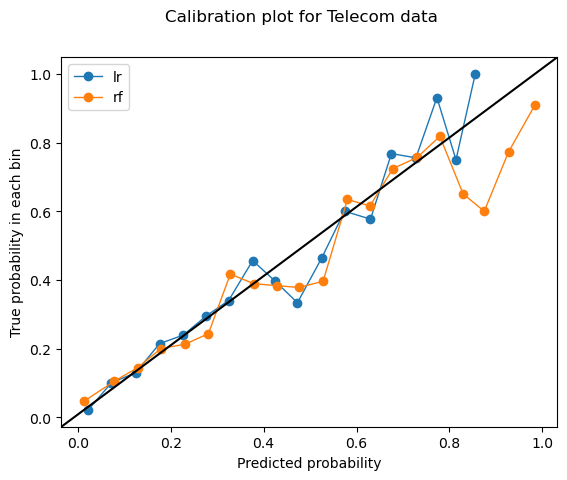

In [53]:
fig, ax = plt.subplots()
# Only These Two Lines Are Calibration Curves
plt.plot(clf_x,clf_y, marker='o', linewidth=1, label='lr')
plt.plot(rlf_x, rlf_y, marker='o', linewidth=1, label='rf')

# Reference Line, Legends, And Axis Labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Telecom data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [54]:
bin_total(y_test, clf_prediction[:,1], n_bins=20)

array([380, 150, 116, 112,  92,  61,  53,  57,  53,  51,  41,  50,  52,
        56,  45,  29,   8,   1,   0,   0,   0], dtype=int64)

In [55]:
bin_total(y_test, rlf_prediction[:,1], n_bins=20)

array([409, 143, 104,  95,  80,  74,  72,  54,  47,  45,  48,  41,  39,
        29,  37,  22,  20,  15,  22,  11,   0], dtype=int64)

##### And I Think It’s Safe To Say That, In This Example, The Random Forest Is Better Calibrated Than Logistic Regression.